### **Contents**

1. Problem Understanding
2. Data Understanding
3. Pre-Processing Data
4. Data Modeling
5. Conclusion
6. Recommendation

****

# Problem Understanding

**Context**


SAUC adalah platform online di Arab Saudi yang menghubungkan pemilik mobil dan pembeli. Interaksi terjadi antara keduanya, dengan SAUC berperan sebagai pihak ketiga. Penjual dapat memasang iklan mobil dengan bebas, tetapi hal ini kadang sulit bagi yang tidak tahu harga pasaran. Harga mobil yang terlalu tinggi dapat mengurangi minat pembeli, sementara harga terlalu rendah berdampak pada keuntungan penjual dan perusahaan. Sebagai pemilik bisnis, SAUC harus memperhatikan agar harga mobil di pasaran sesuai untuk menjaga keuntungan dan popularitas platform.

**Problem Statement**

Tantangan utama yang dihadapi oleh SAUC adalah menjaga keseimbangan harga mobil yang menguntungkan bagi penjual, tetapi tetap menarik bagi pembeli.

Mengingat SAUC menawarkan kebebasan penuh kepada penjual untuk menentukan harga mobil mereka, Dikarenakan kurangnya panduan harga, risiko penentuan harga yang tidak realistis dapat merugikan minat pembeli atau keuntungan penjual. **Dalam menghadapi pertumbuhan pengguna SAUC, penentuan harga yang tepat menjadi kunci untuk tetap kompetitif dalam pasar mobil Arab Saudi.**

**Goals**

Berdasarkan permasalahan tersebut, SAUC tentu perlu memiliki 'tool' yang dapat memprediksi serta membantu klien mereka untuk dapat **menentukan harga mobil yang tepat untuk tiap mobil yang akan mereka jual**. Adanya perbedaan pada berbagai fitur yang terdapat pada suatu mobil, seperti tipe, ukuran mesin, lamanya miles yang ditempuh dapat menambah keakuratan prediksi harga jual, yang mana dapat mendatangkan profit bagi penjual, dan juga tentunya masih terjangkau bagi pembeli.

Bagi SAUC, prediction tool yang dapat memberikan prediksi harga secara fair tentu dapat meningkatkan jumlah penjual maupun listing. Dengan kata lain, semakin banyak penjual dan listing berarti dapat meningkatkan revenue perusahaan, dalam konteks ini didapat dari advertising costs dan proporsi keuntungan penjualan dari pihak pembeli.

**Analytic Approach**

Jadi, yang perlu kita lakukan adalah menganalisis data untuk dapat menemukan pola dari fitur-fitur yang ada, yang membedakan satu mobil dengan yang lainnya. 

Selanjutnya, kita akan membangun suatu model regresi yang akan membantu perusahaan untuk dapat menyediakan 'tool' prediksi harga jual akomodasi yang baru masuk dalam daftar SAUC, yang mana akan berguna untuk penjual dalam menentukan harga jual listing-nya.

# Data Understanding

Sumber : [Saudi Arabia Used Cars](https://drive.google.com/drive/folders/123QthHe9ECfB1qUFCfDinHibrNhsnZKQ) 

**Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| Type | Object | Type of used car |
| Region | Object | The region in which the used car was offered for sale |
| Make | Object | The company name |
| Gear_Type | Object | Gear type size of used car |
| Origin | Object | Origin of used car |
| Options | Object | Options of used car |
| Year | Integer | Manufacturing Year |
| Engine_Size | Float | The engine size of used car |
| Mileage | Integer | Mileage of used car (KM) |
| Negotiable | Boolean | Negotiable or not |
| Price | Integer | Price in riyal |

In [188]:
# Import library yang dibutuhkan untuk eksplorasi dataset
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', 2000)

In [189]:
# Load dataset
raw = pd.read_csv('F:\Data Science Project\Saudi Arabia Used Cars\data\data_saudi_used_cars.csv')
display(raw.head(3),raw.tail(2))

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000


,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
5622,RX,Dammam,Lexus,Automatic,Gulf Arabic,Full,2016,2.5,81000,False,154000
5623,ES,Jeddah,Lexus,Automatic,Other,Full,2017,3.5,115000,True,0


In [190]:
# Dataset Information
pd.DataFrame({
    'feature': raw.columns.values,
    'dtypes': [raw[col].dtype for col in raw.columns],
    'n_unique': raw.nunique().values,
    'n_nan': [raw[col].isna().sum() for col in raw.columns],
    'n_null': [raw[col].isnull().sum() for col in raw.columns],
    'n_dupe': [raw.duplicated().sum() for col in raw.columns],
    'sample_unique': [raw[col].unique() for col in raw.columns]
    })


,feature,dtypes,n_unique,n_nan,n_null,n_dupe,sample_unique
0,Type,object,347,0,0,4,"[Corolla, Yukon, Range Rover, Optima, FJ, CX3, Cayenne S, Sonata, Avalon, LS, C300, Land Cruiser, Hilux, Tucson, Caprice, Sunny, Pajero, Azera, Focus, 5, Spark, Camry, Pathfinder, Accent, ML, Tahoe, Yaris, Suburban, A, Altima, Traverse, Expedition, Senta fe, Liberty, 3, X, Elantra, Land Cruiser Pickup, VTC, Malibu, The 5, A8, Patrol, Grand Cherokee, SL, Previa, SEL, Aveo, MKZ, Victoria, Datsun, Flex, GLC, ES, Edge, 6, Escalade, Innova, Navara, H1, G80, Carnival, Symbol, Camaro, Accord, Avanza, Land Cruiser 70, Taurus, C5700, Impala, Optra, S, Other, Cerato, Furniture, Murano, Explorer, LX, Pick up, Charger, H6, BT-50, Hiace, Ranger, Fusion, Rav4, Ciocca, CX9, Kona, Sentra, Sierra, Durango, CT-S, Sylvian Bus, Navigator, Opirus, Marquis, The 7, FX, Creta, ...]"
1,Region,object,27,0,0,4,"[Abha, Riyadh, Hafar Al-Batin, Aseer, Makkah, Dammam, Yanbu, Al-Baha, Jeddah, Hail, Khobar, Al-Ahsa, Jazan, Al-Medina, Al-Namas, Tabouk, Taef, Qassim, Arar, Jubail, Sabya, Al-Jouf, Najran, Wadi Dawasir, Qurayyat, Sakaka, Besha]"
2,Make,object,58,0,0,4,"[Toyota, GMC, Land Rover, Kia, Mazda, Porsche, Hyundai, Lexus, Chrysler, Chevrolet, Nissan, Mitsubishi, Ford, MG, Mercedes, Jeep, BMW, Audi, Lincoln, Cadillac, Genesis, Renault, Honda, Suzuki, Zhengzhou, Dodge, HAVAL, INFINITI, Isuzu, Changan, Aston Martin, Mercury, Great Wall, Other, Rolls-Royce, MINI, Volkswagen, BYD, Geely, Victory Auto, Classic, Jaguar, Daihatsu, Maserati, Hummer, GAC, Lifan, Bentley, Chery, Peugeot, Foton, Škoda, Fiat, Iveco, SsangYong, FAW, Tata, Ferrari]"
3,Gear_Type,object,2,0,0,4,"[Manual, Automatic]"
4,Origin,object,4,0,0,4,"[Saudi, Gulf Arabic, Other, Unknown]"
5,Options,object,3,0,0,4,"[Standard, Full, Semi Full]"
6,Year,int64,50,0,0,4,"[2013, 2014, 2015, 2020, 2019, 2012, 2016, 1998, 2011, 2008, 1982, 1985, 2018, 1983, 2021, 2017, 2002, 2010, 2009, 2004, 2001, 1986, 2007, 1999, 2005, 1977, 1991, 2003, 1995, 2006, 1997, 1993, 1996, 2000, 1990, 1965, 1980, 1987, 1994, 1988, 1989, 1978, 2022, 1975, 1964, 1984, 1979, 1992, 1963, 1981]"
7,Engine_Size,float64,71,0,0,4,"[1.4, 8.0, 5.0, 2.4, 4.0, 2.0, 4.8, 3.5, 4.6, 5.7, 2.7, 1.0, 3.0, 1.6, 1.5, 3.3, 6.2, 2.5, 5.3, 3.6, 5.4, 1.7, 3.7, 9.0, 4.7, 4.5, 3.8, 5.5, 2.6, 1.8, 1.2, 6.0, 6.9, 3.2, 5.9, 2.2, 5.6, 1.1, 2.9, 4.1, 1.3, 4.4, 2.8, 3.4, 8.8, 6.1, 7.0, 1.9, 7.5, 4.3, 6.5, 3.1, 6.3, 6.4, 5.8, 8.5, 2.3, 6.6, 7.2, 4.2, 5.1, 7.4, 5.2, 2.1, 6.7, 7.8, 3.9, 8.7, 4.9, 6.8, 8.9]"
8,Mileage,int64,1716,0,0,4,"[421000, 80000, 140000, 220000, 49000, 25000, 189000, 155, 110864, 300, 200, 79000, 299000, 17000, 209, 340000, 30000, 71000, 85000, 500000, 290, 74715, 250, 284000, 98000, 3400, 108, 350000, 550000, 204000, 139240, 296, 105920, 187000, 10000, 18500, 292000, 280000, 270000, 345500, 110000, 247000, 55800, 92000, 27000, 600000, 307801, 62000, 38000, 89000, 137000, 422000, 208000, 11000, 245000, 500, 150000, 81000, 156000, 42000, 228000, 24000, 266000, 98100, 182000, 210800, 88000, 214000, 82808, 4000, 417970, 70000, 115, 270373, 91440, 45000, 96000, 50100, 35449, 180, 66200, 100, 349000, 168000, 105000, 130000, 212000, 139740, 256, 280, 73000, 240000, 866, 216, 183000, 148000, 4358765, 188257, 117000, 160000, ...]"
9,Negotiable,bool,2,0,0,4,"[True, False]"


In [191]:
# Summary Statistics

percentiles = [10, 20, 30, 40, 50, 60, 70, 80, 90]
print("Describe Numerical Features")
display(raw.describe(percentiles=[i/100 for i in percentiles]))
print("\nDescribe Categorical Features Values")
display(raw.describe(include=object))

Describe Numerical Features


,Year,Engine_Size,Mileage,Price
count,5624.000000,5624.000000,5.624000e+03,5624.000000
mean,2014.101885,3.295430,1.509234e+05,53074.058144
std,5.791606,1.515108,3.828360e+05,70155.340614
min,1963.000000,1.000000,1.000000e+02,0.000000
10%,2007.000000,1.500000,3.927000e+02,0.000000
20%,2011.000000,2.000000,2.326100e+04,0.000000
30%,2013.000000,2.400000,5.300000e+04,0.000000
40%,2015.000000,2.500000,8.000000e+04,24000.000000
50%,2016.000000,3.000000,1.030000e+05,36500.000000
60%,2016.000000,3.500000,1.320000e+05,50000.000000



Describe Categorical Features Values


,Type,Region,Make,Gear_Type,Origin,Options
count,5624,5624,5624,5624,5624,5624
unique,347,27,58,2,4,3
top,Land Cruiser,Riyadh,Toyota,Automatic,Saudi,Full
freq,269,2272,1431,4875,4188,2233



Data yang disediakan mencakup atribut-atribut penting yang relevan dengan konteks bisnis SAUC dalam mengelola dan mengoptimalkan strategi penetapan harga jual untuk mobil di platform tersebut.

#### **Exploratory Data Analysis**

**Distribution of SAUC**

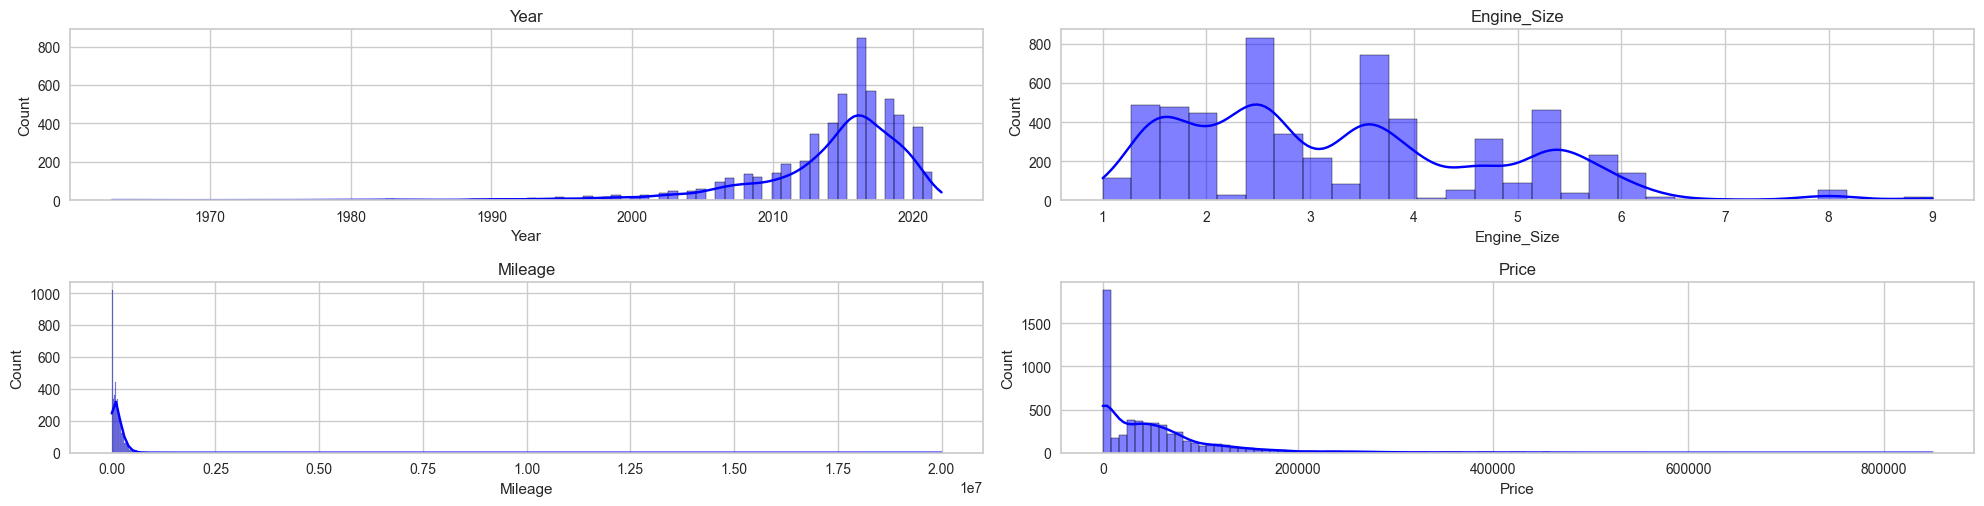

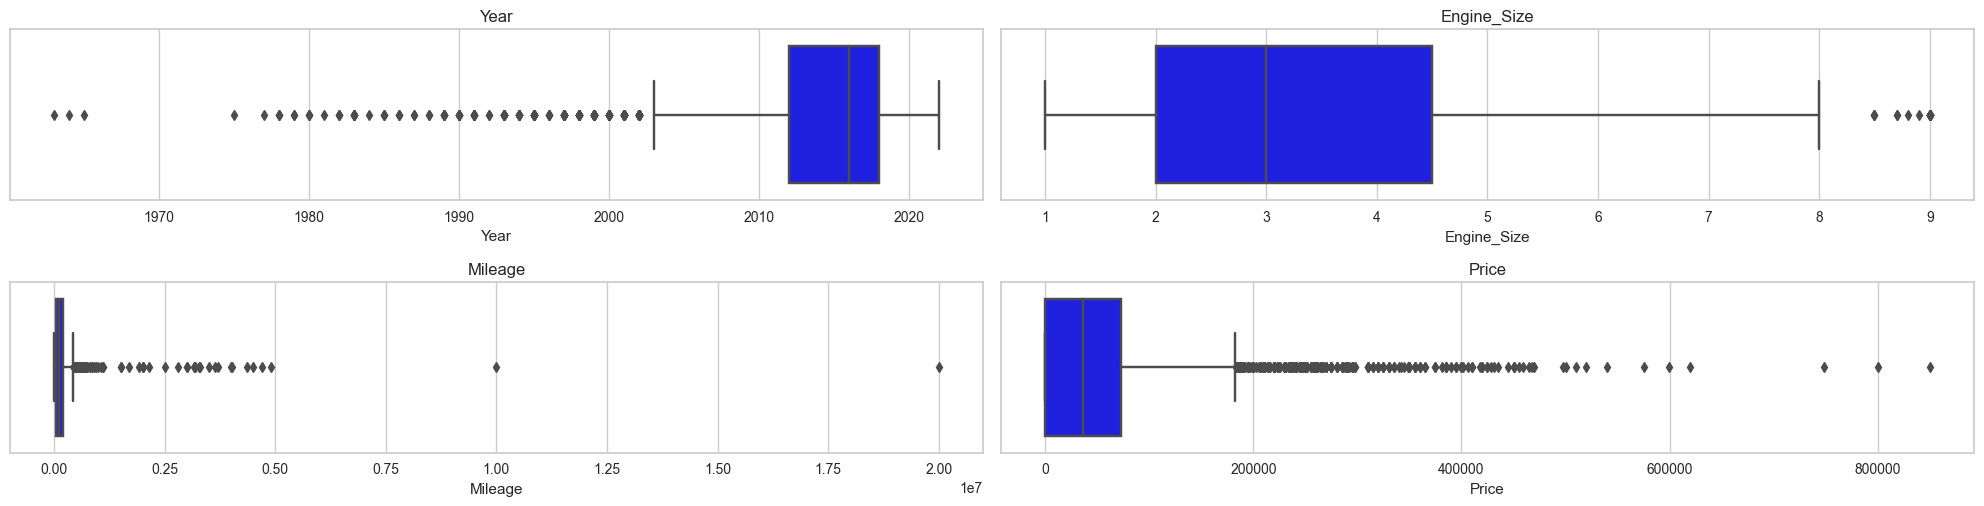

In [192]:
# Distribution Of SAUC

# Select all numerical columns for checking the spread
numeric_columns = raw.select_dtypes(include=np.number).columns.tolist()

# Create a figure with two subplots for each column
plt.figure(figsize=(20, 25))

# Plot histograms with KDE plots
for i, col in enumerate(numeric_columns):
    plt.subplot(10, 2, i + 1)
    sns.histplot(raw[col], kde=True, color='blue')
    plt.title(col)
    plt.tight_layout()

# Create a new figure for box plots
plt.figure(figsize=(20, 25))

# Plot box plots
for i, col in enumerate(numeric_columns):
    plt.subplot(10, 2, i + 1)
    sns.boxplot(x=raw[col], color='blue')
    plt.title(col)
    plt.tight_layout()
plt.show()

**Distribution Information**
| **Columns** | **Skewness** | **Description** |
| --- | --- | --- |
| Year | Left | Mobil yang paling banyak terjual umumnya memiliki tahun pembuatan antara 2010 hingga 2020. Ini dapat diartikan bahwa mobil yang lebih tua jarang terjual (dalam hal ini). |
| Engine_Size | Right | Kebanyakan Mobil memiliki ukuran mesin antara 1 - 6 |
| Mileage | Right | Terdapat nilai yang sangat ekstrem dalam kolom Jarak Tempuh, yaitu 20.000.000 KM. |
| Price | Right | Distribusi data terbanyak berada pada nilai 0. Jika kita mengingat proses Pemahaman Data, sebanyak 30% dari nilai dalam kolom Harga adalah 0. |


based on the data understanding process above, it can be seen that:

* Dataset ini tidak memiliki nilai yang hilang.
* Dataset ini memiliki 4 nilai yang diduplikasi.
* Dataset ini didominasi oleh Variabel Kategorikal.
* Harga jual tertinggi mobil adalah 850.000 Riyal.
* 30% dari total data, harga jual mobil diatur oleh penjual sebagai 0 Riyal. Hal ini disebabkan oleh nilai True dalam variabel Negosiasi.
* Jarak tempuh tertinggi adalah 20.000.000 KM. Ini merupakan kejadian yang tidak mungkin.
* Mobil yang terjual dalam dataset ini berasal dari tahun 1963 - 2022.

**Data Limitasi**
* Ketidaklengkapan Data:
    * Nilai-nilai tidak lengkap yang ada dalam atribut "Type" dan "Make" dimana hanya terdapat 1 nilai.
* Ketidakpastian pada Variabel Kategoris:
    * Variabel kategoris seperti "Negotiable" dapat memiliki nilai yang bersifat subyektif dan dapat diinterpretasikan dengan cara yang berbeda oleh berbagai individu.
* Outliers:
    * Nilai-nilai ekstrem atau outlier dalam atribut seperti "Price" atau "Mileage" dapat mempengaruhi analisis statistik

# Pre-Processing

In [193]:
# Copy Dataset
dfraw = raw.copy()

In [194]:
# Hapus kolom yang tidak akan digunakan dalam modeling 

dfraw = dfraw[dfraw["Negotiable"] == False].reset_index(drop=True)
dfraw = dfraw.drop(columns="Negotiable")

##### a. Duplicate

In [195]:
# Remove Displayed Duplicate

display(dfraw[dfraw.duplicated()])

dfraw = dfraw.drop_duplicates()

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
647,Rio,Riyadh,Kia,Automatic,Saudi,Standard,2016,1.4,270000,25000
3171,Sonata,Jeddah,Hyundai,Automatic,Saudi,Standard,2020,2.4,100,72910
3363,Tucson,Dammam,Hyundai,Automatic,Saudi,Standard,2016,2.0,155000,45000


##### b. Categorical

**Region**

In [196]:
from scipy.stats import kruskal

stat, pval = kruskal(*[dfraw[dfraw['Region'] == region]['Price'] for region in dfraw.Region.unique()])

if pval < 0.05:
    print("Reject H0/Accept Ha")
else:
    print("Accept H0/Reject Ha")

Reject H0/Accept Ha


The Kruskal Wallis Test results show that the median selling price of cars in each region is diff. This indicates that there is Region that affects the selling price of a car.

In [197]:
dfraw.Region.value_counts()

Region
Riyadh            1616
Dammam             748
Jeddah             546
Al-Medina          124
Qassim             112
Al-Ahsa            111
Makkah              87
Aseer               87
Taef                53
Khobar              51
Tabouk              51
Jazan               34
Jubail              34
Abha                30
Hail                25
Najran              19
Al-Baha             18
Yanbu               15
Al-Jouf             15
Hafar Al-Batin      15
Al-Namas            10
Arar                 7
Wadi Dawasir         5
Qurayyat             4
Sakaka               4
Besha                3
Sabya                1
Name: count, dtype: int64

berdasarkan penjelasan diatas saya ambil *10* sebagai batas nilai untuk merubah value dari kolom `Make`

In [198]:
# Melakukan filtering pada data
dfraw['Region'] = dfraw['Region'].apply(lambda x: x if dfraw['Region'].value_counts()[x] >= 10 else 'Other')

**Origin**

In [199]:
# Hypothesis Testing

stat, pval = kruskal(*[dfraw[dfraw['Origin'] == origin]['Price'] for origin in dfraw.Origin.unique()])

if pval < 0.05:
    print("Reject H0/Accept Ha")
else:
    print("Accept H0/Reject Ha")

Reject H0/Accept Ha


The Kruskal Wallis Test results show that the median selling price of cars in each origin is diff. This indicates that there is Origin that affects the selling price of a car.

In [200]:
# Check Origin
dfraw.Origin.value_counts()

Origin
Saudi          2893
Gulf Arabic     495
Other           421
Unknown          16
Name: count, dtype: int64

terdapat valau yang memiliki maksut sama seperti unknown dan other, maka kedua value tersebut akan kita merge

In [201]:
# Merge Origin
dfraw['Origin'] = dfraw['Origin'].replace('Unknown', 'Other')

**Make**

Berdasarkan [Wikipedia](https://en-m-wikipedia-org.translate.goog/wiki/Chevrolet_Suburban?_x_tr_sl=en&_x_tr_tl=id&_x_tr_hl=id&_x_tr_pto=tc) diketahui bahwa mobil buatan Chevrolet dan GMC berasal dari pabrikan yang sama yaitu *Generalis Motors*, berdasarkan data tersebut nilai Chevrolet dan GMC akan di rename ke Generalis Motors

In [202]:
dfraw["Make"] = dfraw['Make'].replace(['Chevrolet','GMC'], 'Generalis Motors')

In [203]:
dfraw.Make.value_counts()

Make
Toyota              890
Hyundai             512
Generalis Motors    463
Ford                346
Nissan              252
Kia                 186
Mercedes            173
Lexus               146
Mazda                92
Honda                85
BMW                  72
Mitsubishi           71
Dodge                68
Land Rover           62
Jeep                 42
Chrysler             36
Genesis              29
Audi                 27
Renault              26
Cadillac             25
Changan              24
Geely                19
MG                   18
Volkswagen           17
Porsche              15
Isuzu                12
INFINITI             10
Suzuki               10
Lincoln               9
HAVAL                 9
Jaguar                8
MINI                  8
Peugeot               7
Mercury               7
Fiat                  6
Other                 5
Daihatsu              4
Bentley               4
FAW                   3
Rolls-Royce           3
Maserati              3
GAC        

berdasarkan deskripsi diatas saya ambil *20* sebagai batas nilai untuk merubah value dari kolom `Make`

In [204]:
# Melakukan filtering pada data
dfraw['Make'] = dfraw['Make'].apply(lambda x: x if dfraw['Make'].value_counts()[x] >= 20 else 'Other')

**Type**

In [205]:
# Melakukan filtering pada data
dfraw['Type'] = dfraw['Type'].apply(lambda x: x if dfraw['Type'].value_counts()[x] >= 5 else 'Other')

**Split**

In [206]:
# Seen & Unseen
from sklearn.model_selection import train_test_split

df , unseen = train_test_split(dfraw,test_size = 0.1,random_state = 42)

**Extract**

In [207]:
# Extract clean Data
file_path = 'F:\Data Science Project\Saudi Arabia Used Cars\data\data_saudi_used_cars_cleaned.csv'
dfraw.to_csv(file_path, index=False)

In [208]:
# Extract seen Data
file_path = 'F:\Data Science Project\Saudi Arabia Used Cars\data\data_saudi_used_cars_seen.csv'
df.to_csv(file_path, index=False)


In [209]:
# Extract unseen Data
file_path = 'F:\Data Science Project\Saudi Arabia Used Cars\data\data_saudi_used_cars_unseen.csv'
unseen.to_csv(file_path, index=False)

##### c. Outliers

In [210]:
# Membuat fungsi untuk mengecek outliers
def find_anomalies(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'IQR: {iqr}')

    limit_bawah = q1 - limit
    limit_atas = q3 + limit
    print(f'limit_bawah: {limit_bawah}')
    print(f'limit_atas: {limit_atas}') 

In [211]:
# Describe Numerical Columns
df.describe()

,Year,Engine_Size,Mileage,Price
count,3442.000000,3442.000000,3.442000e+03,3442.000000
mean,2014.882917,3.183178,1.434705e+05,78979.266996
std,5.124087,1.463084,3.962807e+05,74305.457766
min,1963.000000,1.000000,1.000000e+02,0.000000
25%,2013.000000,2.000000,4.800000e+04,35000.000000
50%,2016.000000,2.700000,1.030000e+05,58000.000000
75%,2018.000000,4.000000,1.810000e+05,95000.000000
max,2021.000000,9.000000,2.000000e+07,850000.000000


**Price**

berdasarkan website [yallamotor](https://ksa.yallamotor.com) mobil dengan harga rendah dan terjual paling banyak di Arab Saudi adalah mobil dengan harga *5000* riyal, berdasarkan data tersebut kita akan beri batasan *5000* riyal sebagai batasan harga terendah.

In [212]:
# Check Outliers
print("\nOutliers pada fitur Price:")
find_anomalies(df.Price)


Outliers pada fitur Price:
IQR: 60000.0
limit_bawah: -55000.0
limit_atas: 185000.0


berdasarkan penjelasan diatas limit atasnya *185000*,  maka dari itu disini saya ambil *5000 - 185000* sebagai batas limit bawah dan atas `Price`

In [213]:
# Cek Price > 185000
df[df['Price'] > 185000].count()['Price']

237

In [214]:
# Melakukan filtering pada data
df = df[(df["Price"] >= 5000) & (df['Price'] <= 185000)]

**Year**

In [215]:
# Check Outliers
print("Outliers pada fitur Year:")
find_anomalies(df.Year)

Outliers pada fitur Year:
IQR: 5.0
limit_bawah: 2005.5
limit_atas: 2025.5


perdasarkan penjelasan diatas saya ambil *2005* sebagai batas bawah `Year`

In [216]:
# Cek Year < 2005
df[df['Year'] < 2005].count()['Price']

134

In [217]:
# Melakukan filtering pada data
df = df[(df["Year"] >= 2005)]

**Mileage**

In [218]:
# Check Outliers

print("\nOutliers pada fitur Mileage:")
find_anomalies(df.Mileage)


Outliers pada fitur Mileage:
IQR: 129602.0
limit_bawah: -139005.0
limit_atas: 379403.0


perdasarkan penjelasan diatas limit atasnya 379403 tetapi ketika saya tinjau berdasarkan penjelasan dari website [noirroadbluesky](https://noirroadbluesky.wordpress.com/2020/03/07/01/) rata-rata perjalanan mobil pertahunnya *(20000 - 30000 KM)* maka akan saya ambil nilai tengah (*25000*),dikarenakan tahun yang akan digunakan 2005 - 2022 yang berarti jika ditotal adalah *425000 (25000 x 17)* atau sekitar *320000* miles , maka dari itu akan saya ambil *320000* sebagai batas atas `Mileage`

In [219]:
# Cek Mileage > 320000
df[df['Mileage'] > 320000].count()['Price']

178

In [220]:
# Melakukan filtering pada data
df = df[(df['Mileage'] <= 320000.0)]

##### d. Result

In [221]:
# Profile

import ydata_profiling
ydata_profiling.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Modelling

##### a. Data Training

In [222]:
# import Training Library
from sklearn.preprocessing import OneHotEncoder,RobustScaler
import category_encoders as ce
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

**Encode**

In [223]:
# Encode & Scale using ColumnTransformer
transformer = ColumnTransformer([
    ('One Hot', OneHotEncoder(), ['Make',"Region","Origin","Gear_Type", 'Options']),
    ('Binary', ce.BinaryEncoder(), ['Type']),
    ('scale', RobustScaler(), ['Year','Engine_Size', 'Mileage'])
])

**Split**

In [259]:
# Data Splitting
X = df.drop(columns='Price')
y = df['Price']

X_train, X_val, y_train, y_val = train_test_split(X,y,test_size = 0.1,random_state = 42)

print(X_train.shape,y_train.shape)
print(X_val.shape, y_val.shape)

(2547, 9) (2547,)
(284, 9) (284,)


##### b. Modeling

In [225]:
# Import Modeling Module
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import Pipeline

In [226]:
# Model Algorithm (modeling)

# Model Algorithm
rf = RandomForestRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)
gbr = GradientBoostingRegressor(random_state=42)
knr = KNeighborsRegressor()
dtr = DecisionTreeRegressor(random_state=42)
lr = LinearRegression()

log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)
log_gbr = TransformedTargetRegressor(gbr, func=np.log, inverse_func=np.exp)
log_knr = TransformedTargetRegressor(knr, func=np.log, inverse_func=np.exp)
log_dtr = TransformedTargetRegressor(dtr, func=np.log, inverse_func=np.exp)
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)

models = [log_rf,log_xgb,log_gbr,log_knr,log_dtr,log_lr]

In [227]:
# Evaluation metric
mean_mape = []
mean_mae = []

for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=42)

    estimator = Pipeline([
        ('preproces', transformer),
        ('model', i)
    ])

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    mean_mae.append(abs(model_cv_mae.mean()))
    
    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    mean_mape.append(abs(model_cv_mape.mean()))

In [228]:
# Compare 6 algorithm

df_eval = pd.DataFrame({
    'Model': ['RandomForest Regressor', 'XGBoost Regressor', 'GradientBoosting Regressor', 'KNeighbors Regressor', 'DecisionTree Regressor', 'Linear Regression'],
    'Mean_MAE': mean_mae,
    'Mean_MAPE': mean_mape,
})
df_eval.sort_values(by="Mean_MAPE", ascending=True)

,Model,Mean_MAE,Mean_MAPE
1,XGBoost Regressor,11237.642699,0.187997
0,RandomForest Regressor,12017.350404,0.198480
2,GradientBoosting Regressor,12727.150657,0.207728
5,Linear Regression,15881.892978,0.258629
4,DecisionTree Regressor,15671.707023,0.275852
3,KNeighbors Regressor,15033.419983,0.279000


##### c. Tuning

In [229]:
# Import Tuning Library
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import RandomizedSearchCV

**Evaluate**

In [230]:
# TEST MODEL

score_mae = []
score_mape = []

# Prediksi pada test set
for i in [xgb,rf]:

    model = Pipeline([
        ('preprocessing', transformer),
        ('model', i)
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    score_mae.append(mean_absolute_error(y_val, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_val, y_pred))

test_eval = pd.DataFrame({'MAE': score_mae, 'MAPE': score_mape}, index=['XGBoost Regressor','Random Forest Regressor'])
test_eval

,MAE,MAPE
XGBoost Regressor,10786.932467,0.199645
Random Forest Regressor,10917.856102,0.200782


**Final Model**

**Hyperparameter Tuning**

In [231]:
# Hyperparameter tuning
# Kedalaman pohon
max_depth = list(np.arange(1, 11))

# Learning rate
learning_rate = list(np.arange(1, 100)/100)

# Jumlah pohon
n_estimators = list(np.arange(100, 1100,100))

# Jumlah baris tiap pohon (% dari total baris train set)
subsample = list(np.arange(2, 10)/10)

# Gamma (min_impurity_decrease)
gamma = list(np.arange(1, 11)) # Semakin besar nilainya, semakin konservatif/simpel modelnya

# Jumlah feature yang digunakan untuk tiap pohon (% dari total kolom train set)
colsample_bytree = list(np.arange(0, 10)/10)

# Alpha (regularization)
reg_alpha = list(np.logspace(-3, 1, 10)) # Semakin besar nilainya, semakin konservatif/simpel modelnya


# # Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha
}

# Creating algorithm chains
estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=101)

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions = hyperparam_space_xgb,
    n_iter = 50,
    cv = crossval, 
    scoring = ['neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_mean_absolute_error', # Optimization based on MAE, in order to reduce the sales loss rate
    random_state = 42,
)


# Fitting data training untuk mencari parameter terbaik
random_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('One '
                                                                               'Hot',
                                                                               OneHotEncoder(),
                                                                               ['Make',
                                                                                'Region',
                                                                                'Origin',
                                                                                'Gear_Type',
                                                                                'Options']),
                                                                              ('Binary',
                                                                               BinaryEncoder(),
                                                                               ['Type']),
                                                                              ('scale',
                                                                               RobustScaler(),
                                                                               ['Year',
                                                                                'Engine_Size',
                                                                                'Mileage'])])),
                                             ('model',
                                              XGBRegressor(base_sco...
                                        'model__reg_alpha': [0.001,
                                                             0.0027825594022071257,
                                                             0.007742636826811269,
                                                             0.021544346900318832,
                                                             0.05994842503189409,
                                                             0.1668100537200059,
                                                             0.46415888336127775,
                                                             1.2915496650148828,
                                                             3.593813663804626,
                                                             10.0],
                                        'model__subsample': [0.2, 0.3, 0.4, 0.5,
                                                             0.6, 0.7, 0.8,
                                                             0.9]},
                   random_state=42, refit='neg_mean_absolute_error',
                   scoring=['neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [232]:
# Cek skor dan params terbaik
print('XGBoost')
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

XGBoost
Best_score: -10448.870305553199
Best_params: {'model__subsample': 0.8, 'model__reg_alpha': 10.0, 'model__n_estimators': 500, 'model__max_depth': 7, 'model__learning_rate': 0.04, 'model__gamma': 7, 'model__colsample_bytree': 0.7}


In [233]:
# Model XGBoost
model = {'XGBoost Regressor': XGBRegressor(random_state=42)}

# Define model terhadap estimator terbaik
xgb_tuning = random_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(X_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(X_val)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
mae_xgb_tuning = mean_absolute_error(y_val, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_val, y_pred_xgb_tuning)

score_after_tuning = pd.DataFrame({'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning}, index=model.keys())
score_after_tuning

,MAE,MAPE
XGBoost Regressor,9441.79061,0.174478


In [234]:
# Compare Before After
before = pd.DataFrame(test_eval.loc['XGBoost Regressor']).T
after = score_after_tuning.copy()

print(f"Before Tuning:")
display(before)

print(f"After Tuning:")
display(after)

Before Tuning:


,MAE,MAPE
XGBoost Regressor,10786.932467,0.199645


After Tuning:


,MAE,MAPE
XGBoost Regressor,9441.79061,0.174478


The model experienced improved performance (RMSE, MAE & MAPE reduced) with hyperparameter tuning. Before tunning, the model can be said to produce a missed prediction of approximately 10786 riyals, and in percentage terms the price prediction will miss 19.9% of the actual price. But after tunning, the model can be said to produce a missed prediction of approximately 9441 riyals, and in percentage terms the price prediction will miss 17.4% of the actual price.

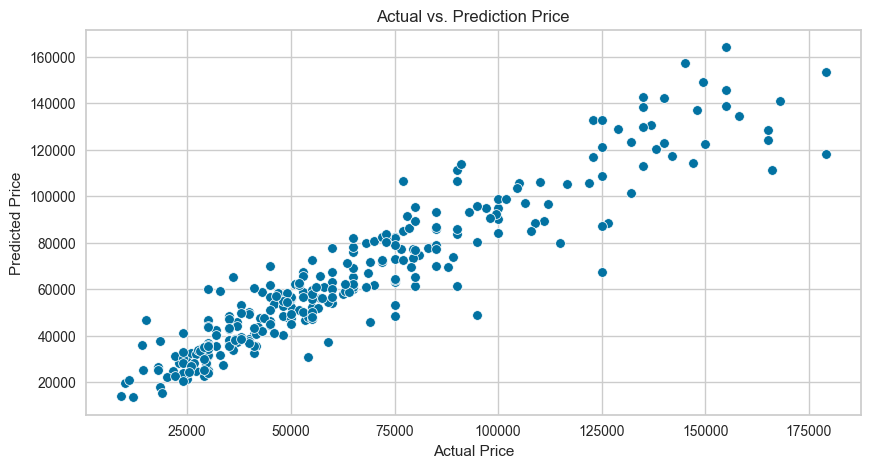

In [235]:
plt.figure(figsize=(10, 5))
plot = sns.scatterplot(x=y_val, y=y_pred_xgb_tuning).set(title='Actual vs. Prediction Price', 
                                               xlabel='Actual Price', 
                                               ylabel='Predicted Price');

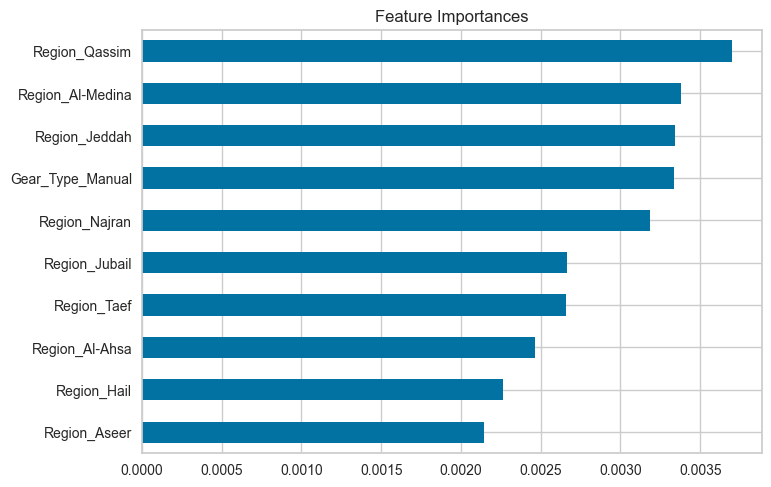

In [236]:
# Check Feature Importance
feature_names = np.concatenate([
    transformer.transformers_[0][1].get_feature_names_out(['Make', 'Region', 'Origin', 'Gear_Type', 'Options']),
    transformer.transformers_[1][1].get_feature_names_out(['Type']),
    transformer.transformers_[2][2]
])

feature_imp = pd.Series(xgb_tuning['model'].feature_importances_, feature_names).sort_values(ascending=True).head(10)
feature_imp.plot(kind='barh', title='Feature Importances');

# Kesimpulan

Berdasarkan pemodelan yang telah dilakukan, analisis regresi berhasil dilakukan dengan menggunakan pendekatan pembelajaran mesin, di mana fitur '`Gear_Type`' dan '`Region`' menjadi fitur yang paling berpengaruh terhadap '`Price`'.

Hal ini dapat dibuktikan dari kinerja model saat menghasilkan nilai prediksi yang menghasilkan kesalahan kecil.

Metrik evaluasi yang digunakan pada model adalah nilai MAE & MAPE. Jika dilihat dari nilai MAPE yang dihasilkan oleh model setelah dilakukan penyetelan hyperparameter, yaitu sebesar 17,4%, kita dapat menyimpulkan bahwa jika nantinya model yang telah kita buat ini digunakan untuk memperkirakan harga listing baru SAUC pada rentang nilai seperti yang dilatih terhadap model (maksimal harga 185.000 Riyal), maka perkiraan harganya rata-rata akan meleset kurang lebih sebesar 17,4% dari harga seharusnya.

Agar model dapat digunakan sebagai solusi untuk rumusan masalah yang telah didefinisikan. Namun, ada batasan pada model yang telah dibangun, beberapa di antaranya adalah fitur yang terbatas dalam memprediksi harga mobil, sehingga model yang telah dibangun masih diklasifikasikan sebagai bias. Masih banyak spesifikasi mobil yang dapat memengaruhi harga jual mobil, misalnya, cacat pada mobil. Selain dari batasan fitur, model ini juga membatasi rentang nilai pada fitur Price, Year, dan Mileage. Model ini akan menghasilkan nilai prediksi yang valid jika harga jual mobil berada dalam rentang 5000 - 200.000 riyal, rentang tahun pembuatan mobil 2005 - 2022, dan mileage tidak melebihi 320.000 mil.

Namun, secara keseluruhan, model ini masih dapat dikategorikan sebagai model dengan kinerja yang baik. Dari lima algoritma, XGBoost adalah algoritma terbaik dengan kesalahan terkecil baik dari segi ketangguhan maupun pengujian. Dengan menggunakan alagoritma XGBoost, hasil prediksi dapat meleset sekitar 9441 riyal dari harga sebenarnya, dan dalam persentase harga prediksi akan meleset sekitar 17,4% dari harga sebenarnya.

# Rekomendasi

Model ini dapat ditingkatkan lebih lanjut untuk menghasilkan prediksi yang lebih baik. Salah satunya adalah dengan meningkatkan jumlah dataset dan fitur. Jika Anda ingat proses Persiapan Data, jumlah catatan dalam dataset yang telah diproses hanya 2831 baris. Jumlah dataset ini masih relatif kecil ketika digunakan sebagai referensi untuk membuat keputusan harga mobil untuk bisnis, terutama karena kurangnya data pada tipe dan mereknya. Selain itu, variabel juga dapat ditambahkan untuk menghindari model yang bias.

# Save Model

In [254]:
# Save model
import pickle

estimator = Pipeline([('preprocess', transformer), ('model', xgb)])
estimator.fit(X_train, y_train)
pickle.dump(estimator, open('F:\Data Science Project\Saudi Arabia Used Cars\model\\final.sav', 'wb'))